## ML Relate for batch 6

I'm going to run ML Relate on the data from batch 6, and play around with it a little to see if I can get a better idea of relatedness than last time. 


<br>
<br>
### I ran ML relate on: 

1. A genepop file where I put all individuals in the same population. <- ML relate confidence intervals fails
2. Genepop files for each region. 
3. Genepop files for each sampling site.
<br>
<br>

<br>

**A little more on ML Relate:** "ML-Relate calculates maximum likelihood estimates of relatedness (r) (See Blouin 2003 for a review). This method was chosen because maximum likelihood estimates of relatedness usually are more accurate than other estimators (Milligan 2003). Likelihood calculations are described in detail by Wagner et al. (2006). ML-Relate uses the downhill simplex routine to find the maximum likelihood estimate of r."

*List output:* "This function lists the log-likelihood of four relationships (U, HS, FS, PO) for all pairs of individuals. "

*Confidence sets:* "This function produces a confidence set for the relationship between pairs of individuals. Simulation is used to perform these statistical tests (Kalinowski et al. 2006), and the user must specify how many random genotypes must be simulated for each test. All relationships that fall within the specified confidence interval are written in the output. "
<br>
<br>
<br>
<br>

**Summary as of 8/1/2017:** ML relate is still putting out a decent number of half and full sibs for the western and southern regions when I ask for the list output (see ML related details below). When I run tests for 95% confidence intervals (also below), it doesn't catch *any* relatedness, even between sample replicates (which should- and do, in the list output - show up as full sibs). Since I'm only running 100 iterations per comparison (ML relate crashed a few different times on 1000), this could be a result of incorrect testing. I then tried to run 95% confidence intervals with 1000 iterations for just Jukbyeon, but still ended up without any HS or FS relationships detected, even for replicates. 
<br>
**Additions 8/2/2017:** Working with the list output. I parsed out the Delta LN(L) values for the "unrelated" label in individuals designated as half- or full-sibs (data used: southern sampling sites). In full sib pairs, the Delta Ln(L) values for "U" were quite high - all above 1500. In half-sib pairs, Delta Ln(L) values for "U" are below 200. I was hoping to find an obvious cutoff point in the histogram, but it doesn't look like there is one. The majority are below Delta Ln(L) = 50 [8/12 pairs].
<br>
**Additions 8/3/2017:** Thinking that the failure to identify siblings in the CI output might be a confidence level issue, I tried lowering the confidence interval significance level from 95% confidence to 70% confidence on the Geoje samples (500 replicates). In the list output, this population had 16 sib pairs (many from replicates). However, none of these pairs were identified in the 95% or the 70% confidence intervals. Looking at the CI output, I started to notice that some pairings were not assigned a relatedness  (U/HS/FS/PO) at all. Maybe these are the pairs that are being identified as siblings in the list output, and that is why the siblings are not being identified in the CI output? Nope. None of the sample pairs that were identified as HS or FS in the list output were left blank in the CI output - they were all assigned "U" for unrelated. 
<br>
**At the very end of the analysis:** I wanted to verify a pattern I saw last time - that the `genepop` file where all sample sites were considered a single population identified fewer sibling pairs than `genepop` files where one sample site was entered as a single population. So I took the list output for all-one-population and compared the number of sibling pairs found to the southern-sites-one-population and the geoje-one-population list output. There were (1) more southern site sibling pairs found in the all-one-population than the southern-sites-one-population, and (2) more geoje sibling pairs found in the all-one-population than the geoje-one-population, which *is the only part about this analysis that makes sense.* All of the geoje sibling pairs found in the southern-sites-one-population were found in the geoje-one-population analysis. 



<br>
<br>
<br>
#### 7/31/2017 

<br>
### All individuals in the same population (CI)

first, I need to create a genepop file where all individuals are listed under the same pop.


In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/notebooks'

In [2]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses


In [3]:
!mkdir ml_relate_batch6

In [5]:
myfile = open("../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE.gen", "r")
newfile = open("ml_relate_batch6/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE_onepop.gen", "w")

pop_count = 0

for line in myfile:
    if not line.startswith("Pop"):
        newfile.write(line)
    elif line.startswith("Pop"):
        if pop_count == 0: 
            newfile.write(line)
            pop_count += 1
        elif pop_count != 0:
            pop_count += 1
myfile.close()
newfile.close()



I then loaded the data into ML Relate. I'm going to try out the Confidence Intervals, so I used the option: 

`Relationship >> Confidence Sets`

And then put in: `0.95` for 95% confidence interval, and `1000` iterations. The program froze... so I started with the regional genepops and used only `100` iterations. 

<br>
<br>
<br>



### Separate Genepops for each Region (CI v. List Output)


<br>
**Generate new genepop files**

In [6]:
# open original genepop, create new genepops
infile = open("../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE.gen", "r")
southfile = open("ml_relate_batch6/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE_south.gen", "w")
eastfile = open("ml_relate_batch6/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE_east.gen", "w")
westfile = open("ml_relate_batch6/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE_west.gen", "w")


pop_count = 0

heading = "#"

#save the title line of the genepop, all of the loci, and the first incidence of "Pop" to an object.
#then write that as the heading for all new genepop files.
for line in infile:
    if not line.startswith("Pop"):
        heading += line
    else:
        heading += line
        break

southfile.write(heading)
eastfile.write(heading)
westfile.write(heading)
        
#separate individuals into the appropriate genepop file using the sample site abbrevs. in sample name
for line in infile:
    if line.startswith("PO") or line.startswith("JB") or line.startswith("NA") or line.startswith("GE"):
        southfile.write(line)
    elif line.startswith("YS") or line.startswith("BOR"):
        westfile.write(line)
    elif line.startswith("JUK"):
        eastfile.write(line)
        
        
infile.close()
southfile.close()
westfile.close()
eastfile.close()

*I then removed the extra "Pop" lines from each genepop file*

<br>
** Run ML Relate**

Parameters for ML Relate on each genepop: 

`0.95` confidence interval

`100` iterations per test


Weird things that happened: When I ran the western samples as two populations (Yellow Sea Block and Boryeong), nearly all of the individual comparisons had a blank in the relationship column.... I tried running it again using a 0.90 confidence interval, with the same result! But ML Relate should be able to handle up to two populations

<br>
**Parse output: SIBLING RELATIONSHIPS ARE IDENTIFIED IMMEDIATELY AFTER THE PYTHON CODE**

In [8]:
cd ml_relate_batch6/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses/ml_relate_batch6


In [10]:
!head parse_MLrelate_ConfidenceSets.py

**East Coast**

In [38]:
!python parse_MLrelate_ConfidenceSets.py MLrelated_east_CI.txt MLrelated_east_CI_parsed.txt

Lines written out indicate errors in script where data was not written to parsed output file.
Parsing file...
error: no relationship calculated for line: 


error: no relationship calculated for line: 


Encountered  2  lines where relationships could not be parsed.
Writing output to file...
Done.


Definite half-sibs found:  0
Definite full-sibs found:  0
Possible half-sibs found:  0
Possible full-sibs found:  0
*Note that if a confidence interval spans both HS and FS, that individual is listed in both categories above.


#### 8/1/2017

*When run with `1000` iterations instead of `100` iterations:*

#### 7/31/2017


**West Coast**

In [39]:
!python parse_MLrelate_ConfidenceSets.py MLrelated_west_CI.txt MLrelated_west_CI_parsed.txt

Lines written out indicate errors in script where data was not written to parsed output file.
Parsing file...
error: no relationship calculated for line: 


error: no relationship calculated for line: 


Encountered  2  lines where relationships could not be parsed.
Writing output to file...
Done.


Definite half-sibs found:  0
Definite full-sibs found:  0
Possible half-sibs found:  0
Possible full-sibs found:  0
*Note that if a confidence interval spans both HS and FS, that individual is listed in both categories above.


#### 7/21/2017

**Southern Coast**

In [1]:
cd ../analyses/ml_relate_batch6/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses/ml_relate_batch6


In [2]:
!python parse_MLrelate_ConfidenceSets.py MLrelated_south_CI.txt MLrelated_south_CI_parsed.txt

Lines written out indicate errors in script where data was not written to parsed output file.
Parsing file...
Encountered  0  lines where relationships could not be parsed.
Writing output to file...
Done.


Definite half-sibs found:  0
Definite full-sibs found:  0
Possible half-sibs found:  0
Possible full-sibs found:  0
*Note that if a confidence interval spans both HS and FS, that individual is listed in both categories above.


<br>

#### 7/31/2017

#### COMPARING AGAINST THE RELATEDNESS DESIGNATION GIVEN IN DEFAULT OUTPUT MATRIX

**West Coast** Sampling Sites as One population

In [29]:
infile = open("MLrelated_west_list.txt", "r")
for line in infile:
    if line.startswith("Ind1"):
        break

h_count = 0
f_count = 0


for line in infile:
    if not line.startswith("#"):
        linelist = line.strip().split()
        if len(linelist) > 2:
            relate = linelist[2]
            if relate == "HS":
                h_count += 1
            elif relate == "FS":
                f_count += 1
                print line
infile.close()

print h_count, " detected half-sib individuals"
print f_count, " detected full-sib individuals"

0  detected half-sib individuals
0  detected full-sib individuals


<br>

**East Coast** Sampling Sites as One population

In [37]:
infile = open("MLrelate_east_list.txt", "r")

h_count = 0
f_count = 0


for line in infile:
    if not line.startswith("#"):
        linelist = line.strip().split()
        relate = linelist[2]
        if relate == "HS":
            h_count += 1
        elif relate == "FS":
            f_count += 1
            print line
infile.close()

print h_count, " detected half-sib individuals"
print f_count, " detected full-sib individuals"
infile.close()

JUK07_02_rep.1	JUK07_02.1	FS	-4726.70		1396.47	685.40	-	219.58

JUK07_09_rep.1	JUK07_09.1	FS	-4981.16		1415.38	691.87	-	233.41

JUK07_16_rep.1	JUK07_16.1	FS	-4664.63		1359.74	676.56	-	231.03

0  detected half-sib individuals
3  detected full-sib individuals


<br>

**Southern Coast** Sampling Sites as One population

In [45]:
infile = open("MLrelate_south_list.txt", "r")

h_count = 0
f_count = 0
h_lines = ""
f_lines = ""

for line in infile:
    if not line.startswith("#"):
        linelist = line.strip().split()
        relate = linelist[2]
        if relate == "HS":
            h_count += 1
            h_lines += line
        elif relate == "FS":
            f_count += 1
            f_lines += line
infile.close()

print h_count, " detected half-sib individuals"
print h_lines
print ""
print ""
print f_count, " detected full-sib individuals"
print f_lines
infile.close()

12  detected half-sib individuals
GE012315_11.1	GE012315_09.1	HS	-7117.97		35.95	-	110.21	9999
NA021015_09.1	NA021015_06.1	HS	-7207.62		103.50	-	202.80	9999
NA021015_10.1	NA021015_06.1	HS	-7371.13		158.67	-	185.12	9999
NA021015_10.1	NA021015_09.1	HS	-7198.87		89.86	-	201.63	9999
NA021015_13.1	NA021015_06.1	HS	-7407.15		13.69	-	298.05	9999
NA021015_13.1	NA021015_10.1	HS	-7387.40		8.91	-	298.49	9999
JB121807_48.1	JB121807_20.1	HS	-4200.76		14.39	-	163.27	9999
JB021108_32	JB021108_20	HS	-5005.14		28.27	-	184.82	9999
GEO020414_17	GEO020414_15	HS	-5362.83		71.25	-	143.67	9999
GEO020414_17	GEO020414_15_300	HS	-5148.35		39.41	-	171.00	9999
GEO020414_17_300	GEO020414_15	HS	-5156.67		55.11	-	146.13	9999
GEO020414_17_300	GEO020414_15_300	HS	-4913.34		46.58	-	162.78	9999



19  detected full-sib individuals
PO010715_02_rep	PO010715_02	FS	-5276.09		999.56	450.36	-	147.51
GE012315_06.1	GE012315_05.1	FS	-5151.73		1673.47	723.04	-	207.67
JB121807_08_rep	JB121807_08	FS	-4152.34		1503.20	760.18	-	254.9

<br>
<br>




<br>
#### 8/2/2017

<br>
### Separate genepops per sampling site (tested southern sites only because they had the most sib relationships in the region genepops)

In [30]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses/ml_relate_batch6'

In [31]:
cd ../

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses


** Make genepop files**

In [32]:
# open original genepop, create new genepops
infile = open("../stacks_b6_wgenome/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE.gen", "r")
pohfile = open("ml_relate_batch6/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE_POH.gen", "w")
jbfile = open("ml_relate_batch6/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE_JB.gen", "w")
gefile = open("ml_relate_batch6/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE_GE.gen", "w")
namfile = open("ml_relate_batch6/batch_6.filteredMAF_filteredLoci_30filteredIndivids_filteredHWE_NAM.gen", "w")


pop_count = 0

heading = "#"

#save the title line of the genepop, all of the loci, and the first incidence of "Pop" to an object.
#then write that as the heading for all new genepop files.
for line in infile:
    if not line.startswith("Pop"):
        heading += line
    else:
        heading += line
        break

pohfile.write(heading)
jbfile.write(heading)
gefile.write(heading)
namfile.write(heading)
        
#separate individuals into the appropriate genepop file using the sample site abbrevs. in sample name
for line in infile:
    if line.startswith("PO"):
        pohfile.write(line)
    elif line.startswith("JB"):
        jbfile.write(line)
    elif line.startswith("NA"):
        namfile.write(line)
    elif line.startswith("GE"):
        gefile.write(line)
        
infile.close()        
pohfile.close()
jbfile.close()
gefile.close()
namfile.close()

**Geoje - 0.95 CI, 500 it**

In [2]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/notebooks'

In [3]:
cd ../analyses/ml_relate_batch6/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses/ml_relate_batch6


In [10]:
!python parse_MLrelate_ConfidenceSets.py MLrelate_ge_CI_95.txt MLrelated_ge_CI_95_parsed.txt

Lines written out indicate errors in script where data was not written to parsed output file.
Parsing file...
Encountered  200  lines where relationships could not be parsed.
Writing output to file...
Done.


Definite half-sibs found:  0
Definite full-sibs found:  0
Possible half-sibs found:  0
Possible full-sibs found:  0
*Note that if a confidence interval spans both HS and FS, that individual is listed in both categories above.


**Geoje - 0.70 CI, 500 it**

In [11]:
!python parse_MLrelate_ConfidenceSets.py MLrelate_ge_CI_70.txt MLrelated_ge_CI_70_parsed.txt

Lines written out indicate errors in script where data was not written to parsed output file.
Parsing file...
Encountered  346  lines where relationships could not be parsed.
Writing output to file...
Done.


Definite half-sibs found:  0
Definite full-sibs found:  0
Possible half-sibs found:  0
Possible full-sibs found:  0
*Note that if a confidence interval spans both HS and FS, that individual is listed in both categories above.


** So something is happening 

<br>
<br>

#### COMPARING AGAINST THE RELATEDNESS DESIGNATION GIVEN IN DEFAULT OUTPUT MATRIX

**GEOJE**

In [34]:
cd ml_relate_batch6/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses/ml_relate_batch6


In [12]:
infile = open("MLrelate_ge_list.txt", "r")

h_count = 0
f_count = 0
h_lines = ""
f_lines = ""

for line in infile:
    if not line.startswith("#"):
        linelist = line.strip().split()
        relate = linelist[2]
        if relate == "HS":
            h_count += 1
            h_lines += line
        elif relate == "FS":
            f_count += 1
            f_lines += line
infile.close()

print h_count, " detected half-sib individuals"
print h_lines
print ""
print ""
print f_count, " detected full-sib individuals"
print f_lines
infile.close()

5  detected half-sib individuals
GE012315_11.1	GE012315_09.1	HS	-7027.63		15.48	-	117.43	9999
GEO020414_17	GEO020414_15	HS	-5224.77		39.61	-	153.23	9999
GEO020414_17	GEO020414_15_300	HS	-5019.15		14.20	-	178.15	9999
GEO020414_17_300	GEO020414_15	HS	-5026.94		28.72	-	154.20	9999
GEO020414_17_300	GEO020414_15_300	HS	-4795.04		26.67	-	168.10	9999



11  detected full-sib individuals
GE012315_06.1	GE012315_05.1	FS	-5021.90		1570.33	703.85	-	205.92
GEO020414_11_300	GEO020414_11	FS	-4720.58		1213.75	591.30	-	9999
GEO020414_14_300	GEO020414_14	FS	-4125.34		1228.21	617.27	-	201.68
GEO020414_15_300	GEO020414_15	FS	-3901.41		782.86	346.41	-	9999
GEO020414_16_300	GEO020414_16	FS	-4222.08		1326.84	670.54	-	9999
GEO020414_17_300	GEO020414_17	FS	-4543.78		947.70	437.25	-	9999
GEO020414_23_300	GEO020414_23	FS	-4861.22		1030.19	485.26	-	150.40
GEO020414_24_300	GEO020414_24	FS	-4803.14		997.51	459.26	-	9999
GEO020414_25_300	GEO020414_25	FS	-3845.23		1217.77	601.61	-	9999
GEO020414_8_300	GEO020414_8	FS	

**Are some of the relationships designated as half- or full-sib in the `list` version the ones that come out blank in the `CI` version?** I changed my python script and the script abov to produce lists, with each entry as `sample1,sample2`. Then I can compare these lists.

In [13]:
infile = open("MLrelate_ge_list.txt", "r")

sib_list = []

for line in infile:
    if not line.startswith("#"):
        linelist = line.strip().split()
        relate = linelist[2]
        if relate == "HS" or relate == "FS":
            sib_list.append(linelist[0] + "," + linelist[1])

In [16]:
infile = open("MLrelate_ge_CI_95.txt", "r")

empty_list = []

for line in infile:
    if not line.startswith("#"):
        linelist = line.strip().split()
        if len(linelist) <= 2:
            empty_list.append(linelist[0] + "," + linelist[1])
infile.close()

In [20]:
mismatch = 0
match = 0
sib_count = 0
for entry in sib_list:
    sib_count += 1
    if entry in empty_list:
        print entry
        match += 1
    else:
        mismatch += 1
print ""
print sib_count, " total sib pairs identified in list output."
print match, " sib pairs identified in list and left blank in confidence intervals"
print mismatch, " sib pairs identified in list but not in confidence intervals"


16  total sib pairs identified in list output.
0  sib pairs identified in list and left blank in confidence intervals
16  sib pairs identified in list but not in confidence intervals


<br>
#### 8/2/2017

<br>
<br>
### Parsing out Delta Ln(L) values

<br>  

In [1]:
cd ../analyses/ml_relate_batch6/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses/ml_relate_batch6


**Extract Delta Ln(L) values for "U" when relationships designated as half or full sib**

In [8]:
infile = open("MLrelate_south_list.txt", "r")

deltal_HS = []
deltal_FS = []

for line in infile:
    if not line.startswith("#"):
        linelist = line.strip().split()
        if linelist[2] == "HS":
            deltal_HS.append(float(linelist[4]))
        elif linelist[2] == "FS":
            deltal_FS.append(float(linelist[4]))
infile.close()

In [9]:
print deltal_HS[1:5]

[103.5, 158.67, 89.86, 13.69]


**Plot histogram of values**

In [10]:
import numpy as np
import matplotlib.pyplot as plt

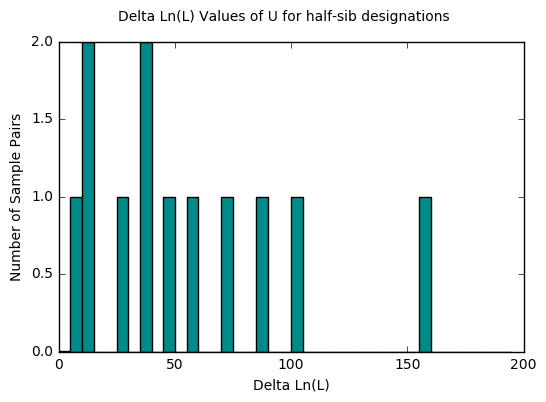

In [13]:
plt.hist(deltal_HS, bins = np.arange(0,200,5), color = "darkcyan")
plt.suptitle("Delta Ln(L) Values of U for half-sib designations")
plt.xlabel("Delta Ln(L)")
plt.ylabel("Number of Sample Pairs")
plt.show()

In [14]:
plt.close()

In [24]:
delta_HS_lt20 = [i for i in deltal_HS if i < 20]
print delta_HS_lt20

[13.69, 8.91, 14.39]


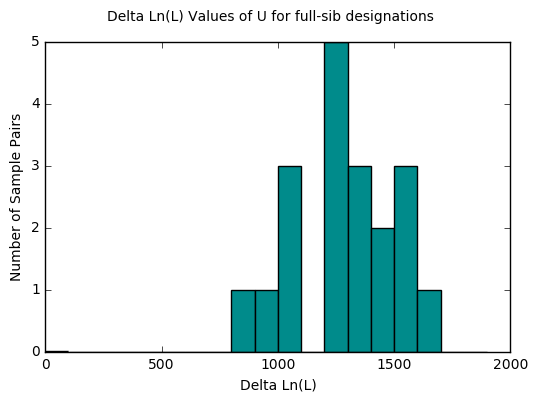

In [27]:
plt.hist(deltal_FS, bins = np.arange(0,2000,100), color = "darkcyan")
plt.suptitle("Delta Ln(L) Values of U for full-sib designations")
plt.xlabel("Delta Ln(L)")
plt.ylabel("Number of Sample Pairs")
plt.show()

In [28]:
plt.close()



<br>
<br>

### Looking for common half- and full- sib pairs between "all sites one genepop" and "south sites one genepop"

In [45]:
southfile = open("MLrelate_south_list.txt", "r")
allfile = open("MLrelate_all_list.txt", "r")

south_halfsib_list = []
all_halfsib_list = []

south_fullsib_list = []
all_fullsib_list = []

for line in southfile:
    if not line.startswith("#"):
        linelist = line.strip().split()
        relate = linelist[2]
        if relate == "HS":
            south_halfsib_list.append(linelist[0] + "," + linelist[1])
        elif relate == "FS":
            south_fullsib_list.append(linelist[0] + "," + linelist[1])
southfile.close()

for line in allfile:
    if not line.startswith("#"):
        linelist = line.strip().split()
        relate = linelist[2]
        if relate == "HS":
            all_halfsib_list.append(linelist[0] + "," + linelist[1])
        elif relate == "FS":
            all_fullsib_list.append(linelist[0] + "," + linelist[1])
allfile.close()


## list comprehension: finding matches between the two analyses

# matches between the lists
halfsib_matches = [pair for pair in south_halfsib_list if pair in all_halfsib_list]
fullsib_matches = [pair for pair in south_fullsib_list if pair in all_fullsib_list]

#pairs only detected in the southern region genepop
halfsib_south_only = [pair for pair in south_halfsib_list if pair not in all_halfsib_list]
fullsib_south_only = [pair for pair in south_fullsib_list if pair not in all_fullsib_list]

#pairs only detected in the all one pop genepop
halfsib_all_only = [pair for pair in all_halfsib_list if pair not in south_halfsib_list]
fullsib_all_only = [pair for pair in all_fullsib_list if pair not in south_fullsib_list]

In [50]:
print "Number of half-sib pairs identified in both analyses: ", len(halfsib_matches)
print "Number of full-sib pairs identified in both analyses: ", len(fullsib_matches)
print ""
print ""
print "Number of sib pairs identified only in southern genepop analysis:"
print "Number of half-sib pairs: ", len(halfsib_south_only)
print "\n".join(halfsib_south_only)
print ""
print "Number of full-sib pairs: ", len(fullsib_south_only)
print "\n".join(fullsib_south_only)
print ""
print ""
print "Number of sib pairs identified only in all-one-pop genepop analysis:"
print "Number of half-sib pairs: ", len(halfsib_all_only)
print "\n".join(halfsib_all_only)
print ""
print "Number of full-sib pairs: ", len(fullsib_all_only)
print "\n".join(fullsib_all_only)

Number of half-sib pairs identified in both analyses:  10
Number of full-sib pairs identified in both analyses:  19


Number of sib pairs identified only in southern genepop analysis:
Number of half-sib pairs:  2
NA021015_13.1,NA021015_06.1
NA021015_13.1,NA021015_10.1

Number of full-sib pairs:  0



Number of sib pairs identified only in all-one-pop genepop analysis:
Number of half-sib pairs:  34
GE011215_10.1,GE011215_08.1
GE011215_14.1,GE011215_10.1
GE012315_09.1,GE011215_30.1
GE012315_09.1,GE012315_08.1
YS_121316_05,YS_121316_03
YS_121316_21,PO010715_26
YS_121316_23,YS_121316_20.1
YS121315_14.1,YS_121316_17
YS121315_14.1,YS_121316_20.1
YS121315_16,YS_121316_21
JUK07_06.1,JUK07_02.1
JUK07_29.1,JUK07_06.1
JB121807_25,GE011215_29.1
JB121807_32.1,JB121807_20.1
JB121807_37,NA021015_25
JB121807_48.1,JB121807_32.1
JB021108_20,JB121807_05
JB021108_20,JB121807_12.1
JB021108_32,JB121807_12.1
JB021108_34,JB121807_34.1
JB021108_41.1,JB121807_21.1
JB021108_48.1,PO010715_06.1
BOR07_10.1,BOR07_07

### Looking for common sibling pairs between all-one-population and geoje analyses

In [23]:
gefile = open("MLrelate_ge_list.txt", "r")
allfile = open("MLrelate_all_list.txt", "r")

ge_halfsib_list = []
all_halfsib_list = []

ge_fullsib_list = []
all_fullsib_list = []

for line in gefile:
    if not line.startswith("#"):
        linelist = line.strip().split()
        relate = linelist[2]
        if relate == "HS":
            ge_halfsib_list.append(linelist[0] + "," + linelist[1])
        elif relate == "FS":
            ge_fullsib_list.append(linelist[0] + "," + linelist[1])
gefile.close()

for line in allfile:
    if not line.startswith("#"):
        linelist = line.strip().split()
        relate = linelist[2]
        if relate == "HS":
            all_halfsib_list.append(linelist[0] + "," + linelist[1])
        elif relate == "FS":
            all_fullsib_list.append(linelist[0] + "," + linelist[1])
allfile.close()


## list comprehension: finding matches between the two analyses

# matches between the lists
halfsib_matches = [pair for pair in ge_halfsib_list if pair in all_halfsib_list]
fullsib_matches = [pair for pair in ge_fullsib_list if pair in all_fullsib_list]

#pairs only detected in the southern region genepop
halfsib_ge_only = [pair for pair in ge_halfsib_list if pair not in all_halfsib_list]
fullsib_ge_only = [pair for pair in ge_fullsib_list if pair not in all_fullsib_list]

#pairs only detected in the all one pop genepop
halfsib_all_only = [pair for pair in all_halfsib_list if pair not in ge_halfsib_list]
fullsib_all_only = [pair for pair in all_fullsib_list if pair not in ge_fullsib_list]

In [25]:
print "Number of half-sib pairs identified in both analyses: ", len(halfsib_matches)
print "Number of full-sib pairs identified in both analyses: ", len(fullsib_matches)
print ""
print ""
print "Number of sib pairs identified only in geoje genepop analysis:"
print "Number of half-sib pairs: ", len(halfsib_ge_only)
print "\n".join(halfsib_ge_only)
print ""
print "Number of full-sib pairs: ", len(fullsib_ge_only)
print "\n".join(fullsib_ge_only)
print ""
print ""
print "Number of sib pairs identified only in all-one-pop genepop analysis:"
print "Number of half-sib pairs: ", len(halfsib_all_only)
print "\n".join(halfsib_all_only)
print ""
print "Number of full-sib pairs: ", len(fullsib_all_only)
print "\n".join(fullsib_all_only)

Number of half-sib pairs identified in both analyses:  5
Number of full-sib pairs identified in both analyses:  11


Number of sib pairs identified only in geoje genepop analysis:
Number of half-sib pairs:  0


Number of full-sib pairs:  0



Number of sib pairs identified only in all-one-pop genepop analysis:
Number of half-sib pairs:  39
GE011215_10.1,GE011215_08.1
GE011215_14.1,GE011215_10.1
GE012315_09.1,GE011215_30.1
GE012315_09.1,GE012315_08.1
NA021015_09.1,NA021015_06.1
NA021015_10.1,NA021015_06.1
NA021015_10.1,NA021015_09.1
YS_121316_05,YS_121316_03
YS_121316_21,PO010715_26
YS_121316_23,YS_121316_20.1
YS121315_14.1,YS_121316_17
YS121315_14.1,YS_121316_20.1
YS121315_16,YS_121316_21
JUK07_06.1,JUK07_02.1
JUK07_29.1,JUK07_06.1
JB121807_25,GE011215_29.1
JB121807_32.1,JB121807_20.1
JB121807_37,NA021015_25
JB121807_48.1,JB121807_20.1
JB121807_48.1,JB121807_32.1
JB021108_20,JB121807_05
JB021108_20,JB121807_12.1
JB021108_32,JB121807_12.1
JB021108_32,JB021108_20
JB021108_34,JB121807_34.

### Comparing sibling pairs in southern-sites-all-one-pop and geoje-all-one-pop analyses

In [26]:
gefile = open("MLrelate_ge_list.txt", "r")
southfile = open("MLrelate_south_list.txt", "r")

ge_halfsib_list = []
south_halfsib_list = []

ge_fullsib_list = []
south_fullsib_list = []

for line in gefile:
    if not line.startswith("#"):
        linelist = line.strip().split()
        relate = linelist[2]
        if relate == "HS":
            ge_halfsib_list.append(linelist[0] + "," + linelist[1])
        elif relate == "FS":
            ge_fullsib_list.append(linelist[0] + "," + linelist[1])
gefile.close()

for line in southfile:
    if not line.startswith("#"):
        linelist = line.strip().split()
        relate = linelist[2]
        if relate == "HS":
            south_halfsib_list.append(linelist[0] + "," + linelist[1])
        elif relate == "FS":
            south_fullsib_list.append(linelist[0] + "," + linelist[1])
southfile.close()


## list comprehension: finding matches between the two analyses

# matches between the lists
halfsib_matches = [pair for pair in ge_halfsib_list if pair in south_halfsib_list]
fullsib_matches = [pair for pair in ge_fullsib_list if pair in south_fullsib_list]

#pairs only detected in the southern region genepop
halfsib_ge_only = [pair for pair in ge_halfsib_list if pair not in south_halfsib_list]
fullsib_ge_only = [pair for pair in ge_fullsib_list if pair not in south_fullsib_list]

#pairs only detected in the all one pop genepop
halfsib_south_only = [pair for pair in south_halfsib_list if pair not in ge_halfsib_list]
fullsib_south_only = [pair for pair in south_fullsib_list if pair not in ge_fullsib_list]

In [27]:
print "Number of half-sib pairs identified in both analyses: ", len(halfsib_matches)
print "Number of full-sib pairs identified in both analyses: ", len(fullsib_matches)
print ""
print ""
print "Number of sib pairs identified only in geoje genepop analysis:"
print "Number of half-sib pairs: ", len(halfsib_ge_only)
print "\n".join(halfsib_ge_only)
print ""
print "Number of full-sib pairs: ", len(fullsib_ge_only)
print "\n".join(fullsib_ge_only)
print ""
print ""
print "Number of sib pairs identified only in south-one-pop genepop analysis:"
print "Number of half-sib pairs: ", len(halfsib_south_only)
print "\n".join(halfsib_south_only)
print ""
print "Number of full-sib pairs: ", len(fullsib_south_only)
print "\n".join(fullsib_south_only)

Number of half-sib pairs identified in both analyses:  5
Number of full-sib pairs identified in both analyses:  11


Number of sib pairs identified only in geoje genepop analysis:
Number of half-sib pairs:  0


Number of full-sib pairs:  0



Number of sib pairs identified only in south-one-pop genepop analysis:
Number of half-sib pairs:  7
NA021015_09.1,NA021015_06.1
NA021015_10.1,NA021015_06.1
NA021015_10.1,NA021015_09.1
NA021015_13.1,NA021015_06.1
NA021015_13.1,NA021015_10.1
JB121807_48.1,JB121807_20.1
JB021108_32,JB021108_20

Number of full-sib pairs:  8
PO010715_02_rep,PO010715_02
JB121807_08_rep,JB121807_08
JB121807_46,JB121807_44
JB021108_05_rep,JB021108_05
JB021108_35_rep,JB021108_35
JB021108_36_rep.1,JB021108_36.1
JB021108_37_rep.1,JB021108_37.1
JB021108_46_rep.1,JB021108_46.1
